In [1]:
import numpy as np
import pandas as pd

## Data

In [7]:
df = pd.read_csv("00-1-shipman-confirmed-victims-x.csv")

df.head()

,DateofDeath,Name,Age,PlaceofDeath,Decision,yearOfDeath,gender,fractionalDeathYear,ageBracket,gender2
0,17-Mar-75,Eva Lyons,70,Own home,Unlawful killing,1975,0,1974.71,70-74,Women
1,07-Aug-78,Sarah Hannah Marsland,86,Own home,Unlawful killing,1978,0,1978.10,85-89,Women
2,30-Aug-78,Mary Ellen Jordan,73,Own home,Unlawful killing,1978,0,1978.16,70-74,Women
3,07-Dec-78,Harold Bramwell,73,Own home,Unlawful killing,1978,1,1978.44,70-74,Men
4,20-Dec-78,Annie Campbell,88,Own home,Unlawful killing,1978,0,1978.47,85-89,Women


## With plotly

In [2]:
import plotly.graph_objects as go
import plotly.express as px

In [44]:
fig = px.scatter(df, x="fractionalDeathYear", y="Age", color="gender2", marginal_x="histogram", marginal_y="histogram")

fig.update_layout(
    autosize=False,
    width=800,
    height=600,
    yaxis_title="Age of victim", 
    xaxis_title="Year of Death", 
    bargap=0.2, # gap between bars of adjacent location coordinates
    bargroupgap=0. # gap between bars of the same location coordinates,
)


fig

In [5]:
px.pie(df, names=df.gender2.unique(), values=df.gender2.value_counts())

## With plotnine

In [6]:
from plotnine import *

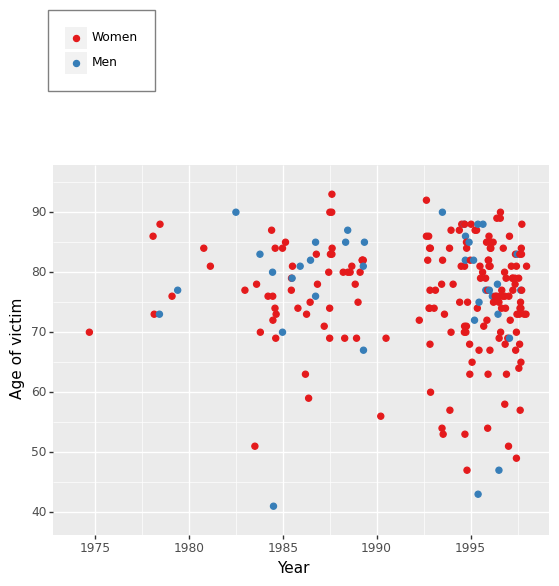

<ggplot: (-9223371888194902224)>

In [55]:
s = ggplot(df, aes(x="fractionalDeathYear", y="Age", colour="reorder(gender2, gender)")) # initialise plot for the scatter-chart
s += geom_point(size=2) # assign scatter chart-type with size 2 points
s += labs(x="Year", y="Age of victim") # Adds axis labels  
s += scale_x_continuous(breaks=range(1975, 1996, 5), limits=[1974,1998]) #x-axis labels every 5 years and between 74 and 98 
s += scale_y_continuous(breaks=range(40, 91, 10), limits=[39,95]) # y-axis every 10 years and between 39 and 95
#s += scale_size_continuous(name="Size", guide=False)  # turns off size legend
s += scale_color_brewer(type="qual", palette="Set1") # sets the colour palette 
s += theme(legend_position=(0.2,1.12), legend_background=element_rect(color="grey"), legend_title=element_blank()) # positions. borders, and un-titles the legend

s


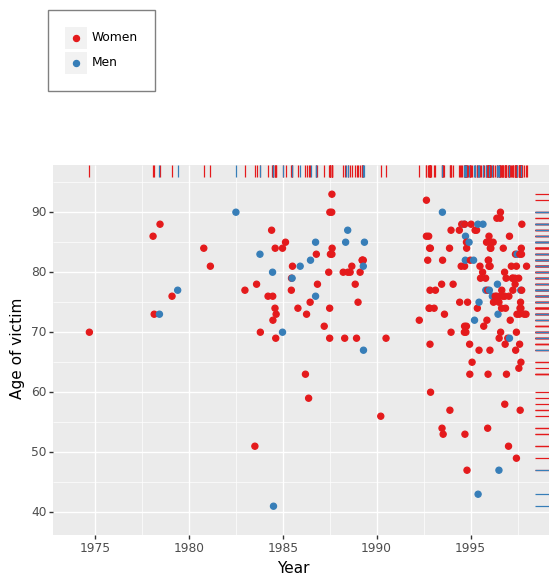

<ggplot: (-9223371888194902224)>

In [56]:
s += geom_rug(sides="tr", show_legend=False)

s